In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt

# import seaborn as sns
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import plotly.figure_factory as ff

%load_ext lab_black

In [32]:
# client = Socrata("data.austintexas.gov", None)
# results = client.get("7d8e-dm7r", limit=83000000)

# Convert to pandas DataFrame
# df = pd.DataFrame.from_records(results)

In [17]:
df = pd.read_csv("../data/Shared_Micromobility_Vehicle_Trips.csv", low_memory=False)

#df.to_csv("../data/Shared_Micromobility_Vehicle_Trips.csv", index=False)

In [10]:
df.tail()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
9950881,856e419a-7f11-4fcb-af71-981798c760fe,b2982c20-0dbd-45b2-9903-8c012b909bfb,scooter,140,394,2020-11-11T02:00:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:29.000,11,2,2,9,9,2020,48453000603,48453000604
9950882,9ffdafa4-352b-45df-9f49-d4fff302ad93,6bd7645c-a5c4-4b1b-b328-0becbf50369b,scooter,269,1089,2020-11-11T01:45:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:39.000,11,2,2,9,9,2020,48453001100,48453001100
9950883,62919757-e234-48cc-848a-ca932d3d3c49,59178897-768d-4ec6-a874-df266dbad96e,scooter,287,1399,2020-11-11T01:45:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:46.000,11,2,2,3,3,2020,48453002316,48453002316
9950884,4d47e1c3-08ab-49ad-8e2c-d2d0be7dcb00,b2447d78-4e74-4cce-9d7c-4510d07e858f,scooter,119,16,2020-11-11T02:00:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:55.000,11,2,2,9,9,2020,48453000401,48453000401
9950885,7167723f-75f5-485e-8662-b1aedd98e8d9,797e528a-2bf1-41b4-ab99-259c2f7e6d32,scooter,287,0,2020-11-11T01:45:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:55.000,11,2,2,9,9,2020,48453001100,48453001100


In [11]:
df.describe()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
count,9950886,9950886,9950886,9950886,9950886,9950886,9950886,9950886,9950886,9950886,9950886,9950752,9950752,9950886,9950751,9950751
unique,9950886,96999,3,16930,112061,86292,86368,493386,12,24,7,12,12,3,297,301
top,4bdcb369-8e1d-4c44-b082-b80d2ba49ecd,49b0ba01-7c8b-4504-b8b0-ff3380ffce83,scooter,240,0,2019-03-16T16:45:00.000,2019-03-10T16:45:00.000,2019-04-17T02:35:02.000,10,17,6,9,9,2019,48453001100,48453001100
freq,1,848,9410417,18346,676356,1441,1372,13277,1268820,792739,2010579,7813572,7666847,6037995,3938895,3814335


In [12]:
df.shape

(9950886, 16)

### Scooters Vs Bicycle Counts

In [14]:
df["vehicle_type"].value_counts()

scooter    9410417
bicycle     453169
moped        87300
Name: vehicle_type, dtype: int64

### Year counts

In [15]:
df["year"].value_counts()

2019    6037995
2018    2305093
2020    1607798
Name: year, dtype: int64

### Find number of Null Values: 

In [18]:
df.apply(lambda x: x.isnull().value_counts())

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
False,9950886.0,9950886.0,9950886.0,9950886.0,9950886.0,9950886.0,9950886.0,9950886.0,9950886.0,9950886.0,9950886.0,9950752,9950752,9950886.0,9950751,9950751
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134,134,NaN,135,135


In [27]:
df["trip_distance"] = df["trip_distance"].apply(float)

In [25]:
df = df.dropna()

### Find all the 0 meters or negative meters trip distance values.

In [28]:
rows = df.shape[0]

trips_df = df[df["trip_distance"] > 0]
neg_0m_rows = rows - trips_df.shape[0]
rows_remaining = trips_df.shape[0]
print("Negative or 0m distance trips: " + str(neg_0m_rows))

Negative or 0m distance trips: 676995


In [29]:
len(df[df["trip_distance"] <= 0])

676995

### Yearly Analysis

In [33]:
year_count = df.groupby(["year"]).count()["trip_id"]

In [34]:
year_count

year
2018    2305092
2019    6037861
2020    1607798
Name: trip_id, dtype: int64

In [46]:
year_df = df.groupby(["year", "vehicle_type"]).count()["trip_id"]

In [47]:
year_df

year  vehicle_type
2018  bicycle           76604
      scooter         2228488
2019  bicycle          340144
      moped             14098
      scooter         5683619
2020  bicycle           36419
      moped             73202
      scooter         1498177
Name: trip_id, dtype: int64

In [52]:
df.apply(lambda x: x.isnull().value_counts())

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
False,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751,9950751


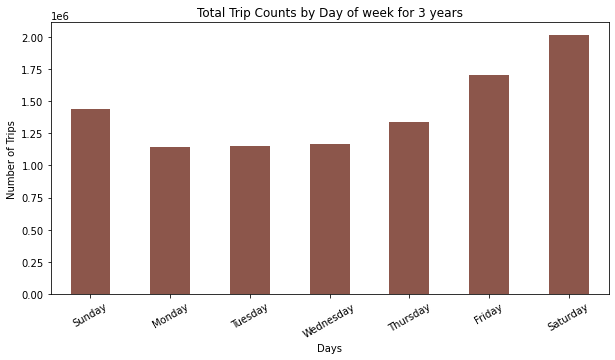

In [70]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df["day_of_week"].value_counts().sort_index())

# Map day of week with actual names:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
daily_total["Days"] = days

# Plot glyph:
daily_total.plot(
    kind="bar",
    x="Days",
    y="day_of_week",
    title="Total Trip Counts by Day of week for 3 years",
    figsize=(10, 5),
    rot=30,
    color="tab:brown",
    legend=False,
)
plt.ylabel("Number of Trips")
# plt.savefig("Plots/trips_per_week.png")
plt.show()

In [76]:
two_years_df = df.loc[(df["year"] == "2019") | (df["year"] == "2020")]
two_years_df.head()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end
777654,56ebfc5b-def6-4d6b-a2e4-b8495a072c1d,3c68ff46-80ee-4580-b8da-3ba8099a8a82,moped,2382,10781.0,2020-10-04T23:45:00.000,2020-10-05T00:30:00.000,2020-11-02T19:41:42.000,10,0,0,3,9,2020,48453000902,48453001100
779015,3b4a99c4-2f7e-4af6-a04e-6453705907b9,b6fc8240-397e-46ce-82a1-22537bb33556,moped,972,5958.0,2020-10-05T00:30:00.000,2020-10-05T00:45:00.000,2020-11-02T19:41:42.000,10,0,0,3,9,2020,48453000801,48453001100
791125,bc0d9944-5df8-4645-8a0c-70849b0b6d1a,89759b3a-83ab-4f68-bf6e-1cc229429134,moped,375,1601.0,2020-10-05T00:45:00.000,2020-10-05T00:45:00.000,2020-11-02T19:41:43.000,10,0,0,3,3,2020,48453002316,48453002315
818779,3961a21b-056c-4e77-af0d-b9ad9f0fd491,89759b3a-83ab-4f68-bf6e-1cc229429134,moped,23,0.0,2020-10-05T00:45:00.000,2020-10-05T00:45:00.000,2020-11-02T19:41:43.000,10,0,0,3,3,2020,48453002315,48453002315
822691,32b57dd3-08b8-4a21-a9c8-1ffc794e3eb8,5aefb7d6-3fb9-4019-aa26-9238b1a1ac10,moped,867,3840.0,2020-10-05T00:45:00.000,2020-10-05T01:00:00.000,2020-11-02T19:41:43.000,10,1,0,9,9,2020,48453000700,48453001100


In [66]:
two_years_df.shape

(7645659, 16)

In [68]:
two_years_df.groupby(["year", "vehicle_type"]).count()["trip_id"]

year  vehicle_type
2019  bicycle          340144
      moped             14098
      scooter         5683619
2020  bicycle           36419
      moped             73202
      scooter         1498177
Name: trip_id, dtype: int64

### Split the data for 2019 and 2020

In [ ]:
year2019 = df.loc[(df["year"] == "2019")]
year2020 = df.loc[(df["year"] == "2020")]

In [71]:
year2019.groupby(["vehicle_type"]).count()["trip_id"]

vehicle_type
bicycle     340144
moped        14098
scooter    5683619
Name: trip_id, dtype: int64

In [72]:
year2020.groupby(["vehicle_type"]).count()["trip_id"]

vehicle_type
bicycle      36419
moped        73202
scooter    1498177
Name: trip_id, dtype: int64

In [74]:
year2019.shape

(6037861, 16)

In [75]:
year2020.shape

(1607798, 16)

In [78]:
year2019.drop(columns=["council_district_start", "council_district_end"])
year2020.drop(columns=["council_district_start", "council_district_end"])

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
777654,56ebfc5b-def6-4d6b-a2e4-b8495a072c1d,3c68ff46-80ee-4580-b8da-3ba8099a8a82,moped,2382,10781.0,2020-10-04T23:45:00.000,2020-10-05T00:30:00.000,2020-11-02T19:41:42.000,10,0,0,2020,48453000902,48453001100
779015,3b4a99c4-2f7e-4af6-a04e-6453705907b9,b6fc8240-397e-46ce-82a1-22537bb33556,moped,972,5958.0,2020-10-05T00:30:00.000,2020-10-05T00:45:00.000,2020-11-02T19:41:42.000,10,0,0,2020,48453000801,48453001100
791125,bc0d9944-5df8-4645-8a0c-70849b0b6d1a,89759b3a-83ab-4f68-bf6e-1cc229429134,moped,375,1601.0,2020-10-05T00:45:00.000,2020-10-05T00:45:00.000,2020-11-02T19:41:43.000,10,0,0,2020,48453002316,48453002315
818779,3961a21b-056c-4e77-af0d-b9ad9f0fd491,89759b3a-83ab-4f68-bf6e-1cc229429134,moped,23,0.0,2020-10-05T00:45:00.000,2020-10-05T00:45:00.000,2020-11-02T19:41:43.000,10,0,0,2020,48453002315,48453002315
822691,32b57dd3-08b8-4a21-a9c8-1ffc794e3eb8,5aefb7d6-3fb9-4019-aa26-9238b1a1ac10,moped,867,3840.0,2020-10-05T00:45:00.000,2020-10-05T01:00:00.000,2020-11-02T19:41:43.000,10,1,0,2020,48453000700,48453001100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950881,856e419a-7f11-4fcb-af71-981798c760fe,b2982c20-0dbd-45b2-9903-8c012b909bfb,scooter,140,394.0,2020-11-11T02:00:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:29.000,11,2,2,2020,48453000603,48453000604
9950882,9ffdafa4-352b-45df-9f49-d4fff302ad93,6bd7645c-a5c4-4b1b-b328-0becbf50369b,scooter,269,1089.0,2020-11-11T01:45:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:39.000,11,2,2,2020,48453001100,48453001100
9950883,62919757-e234-48cc-848a-ca932d3d3c49,59178897-768d-4ec6-a874-df266dbad96e,scooter,287,1399.0,2020-11-11T01:45:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:46.000,11,2,2,2020,48453002316,48453002316
9950884,4d47e1c3-08ab-49ad-8e2c-d2d0be7dcb00,b2447d78-4e74-4cce-9d7c-4510d07e858f,scooter,119,16.0,2020-11-11T02:00:00.000,2020-11-11T02:00:00.000,2020-11-12T03:16:55.000,11,2,2,2020,48453000401,48453000401


In [79]:
year2019.to_csv("../data/2019data.csv", index=False)
year2020.to_csv("../data/2020data.csv", index=False)